In [4]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
from scipy import stats
from statsmodels.formula.api import ols, glm

In [13]:

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

boston=pd.DataFrame(data)

print(boston)

          0     1      2    3      4      5     6       7    8      9     10  \
0    0.00632  18.0   2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1    0.02731   0.0   7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2    0.02729   0.0   7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3    0.03237   0.0   2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4    0.06905   0.0   2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   
..       ...   ...    ...  ...    ...    ...   ...     ...  ...    ...   ...   
501  0.06263   0.0  11.93  0.0  0.573  6.593  69.1  2.4786  1.0  273.0  21.0   
502  0.04527   0.0  11.93  0.0  0.573  6.120  76.7  2.2875  1.0  273.0  21.0   
503  0.06076   0.0  11.93  0.0  0.573  6.976  91.0  2.1675  1.0  273.0  21.0   
504  0.10959   0.0  11.93  0.0  0.573  6.794  89.3  2.3889  1.0  273.0  21.0   
505  0.04741   0.0  11.93  0.0  0.573  6.030  80.8  2.5050  1.0  273.0  21.0   

         11    12  
0    396.90  4.98  

In [15]:
from sklearn import datasets
boston, y = datasets.fetch_openml('boston', return_X_y=True)
boston['TARGET']=y
boston

c:\Users\admin\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:292: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
c:\Users\admin\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


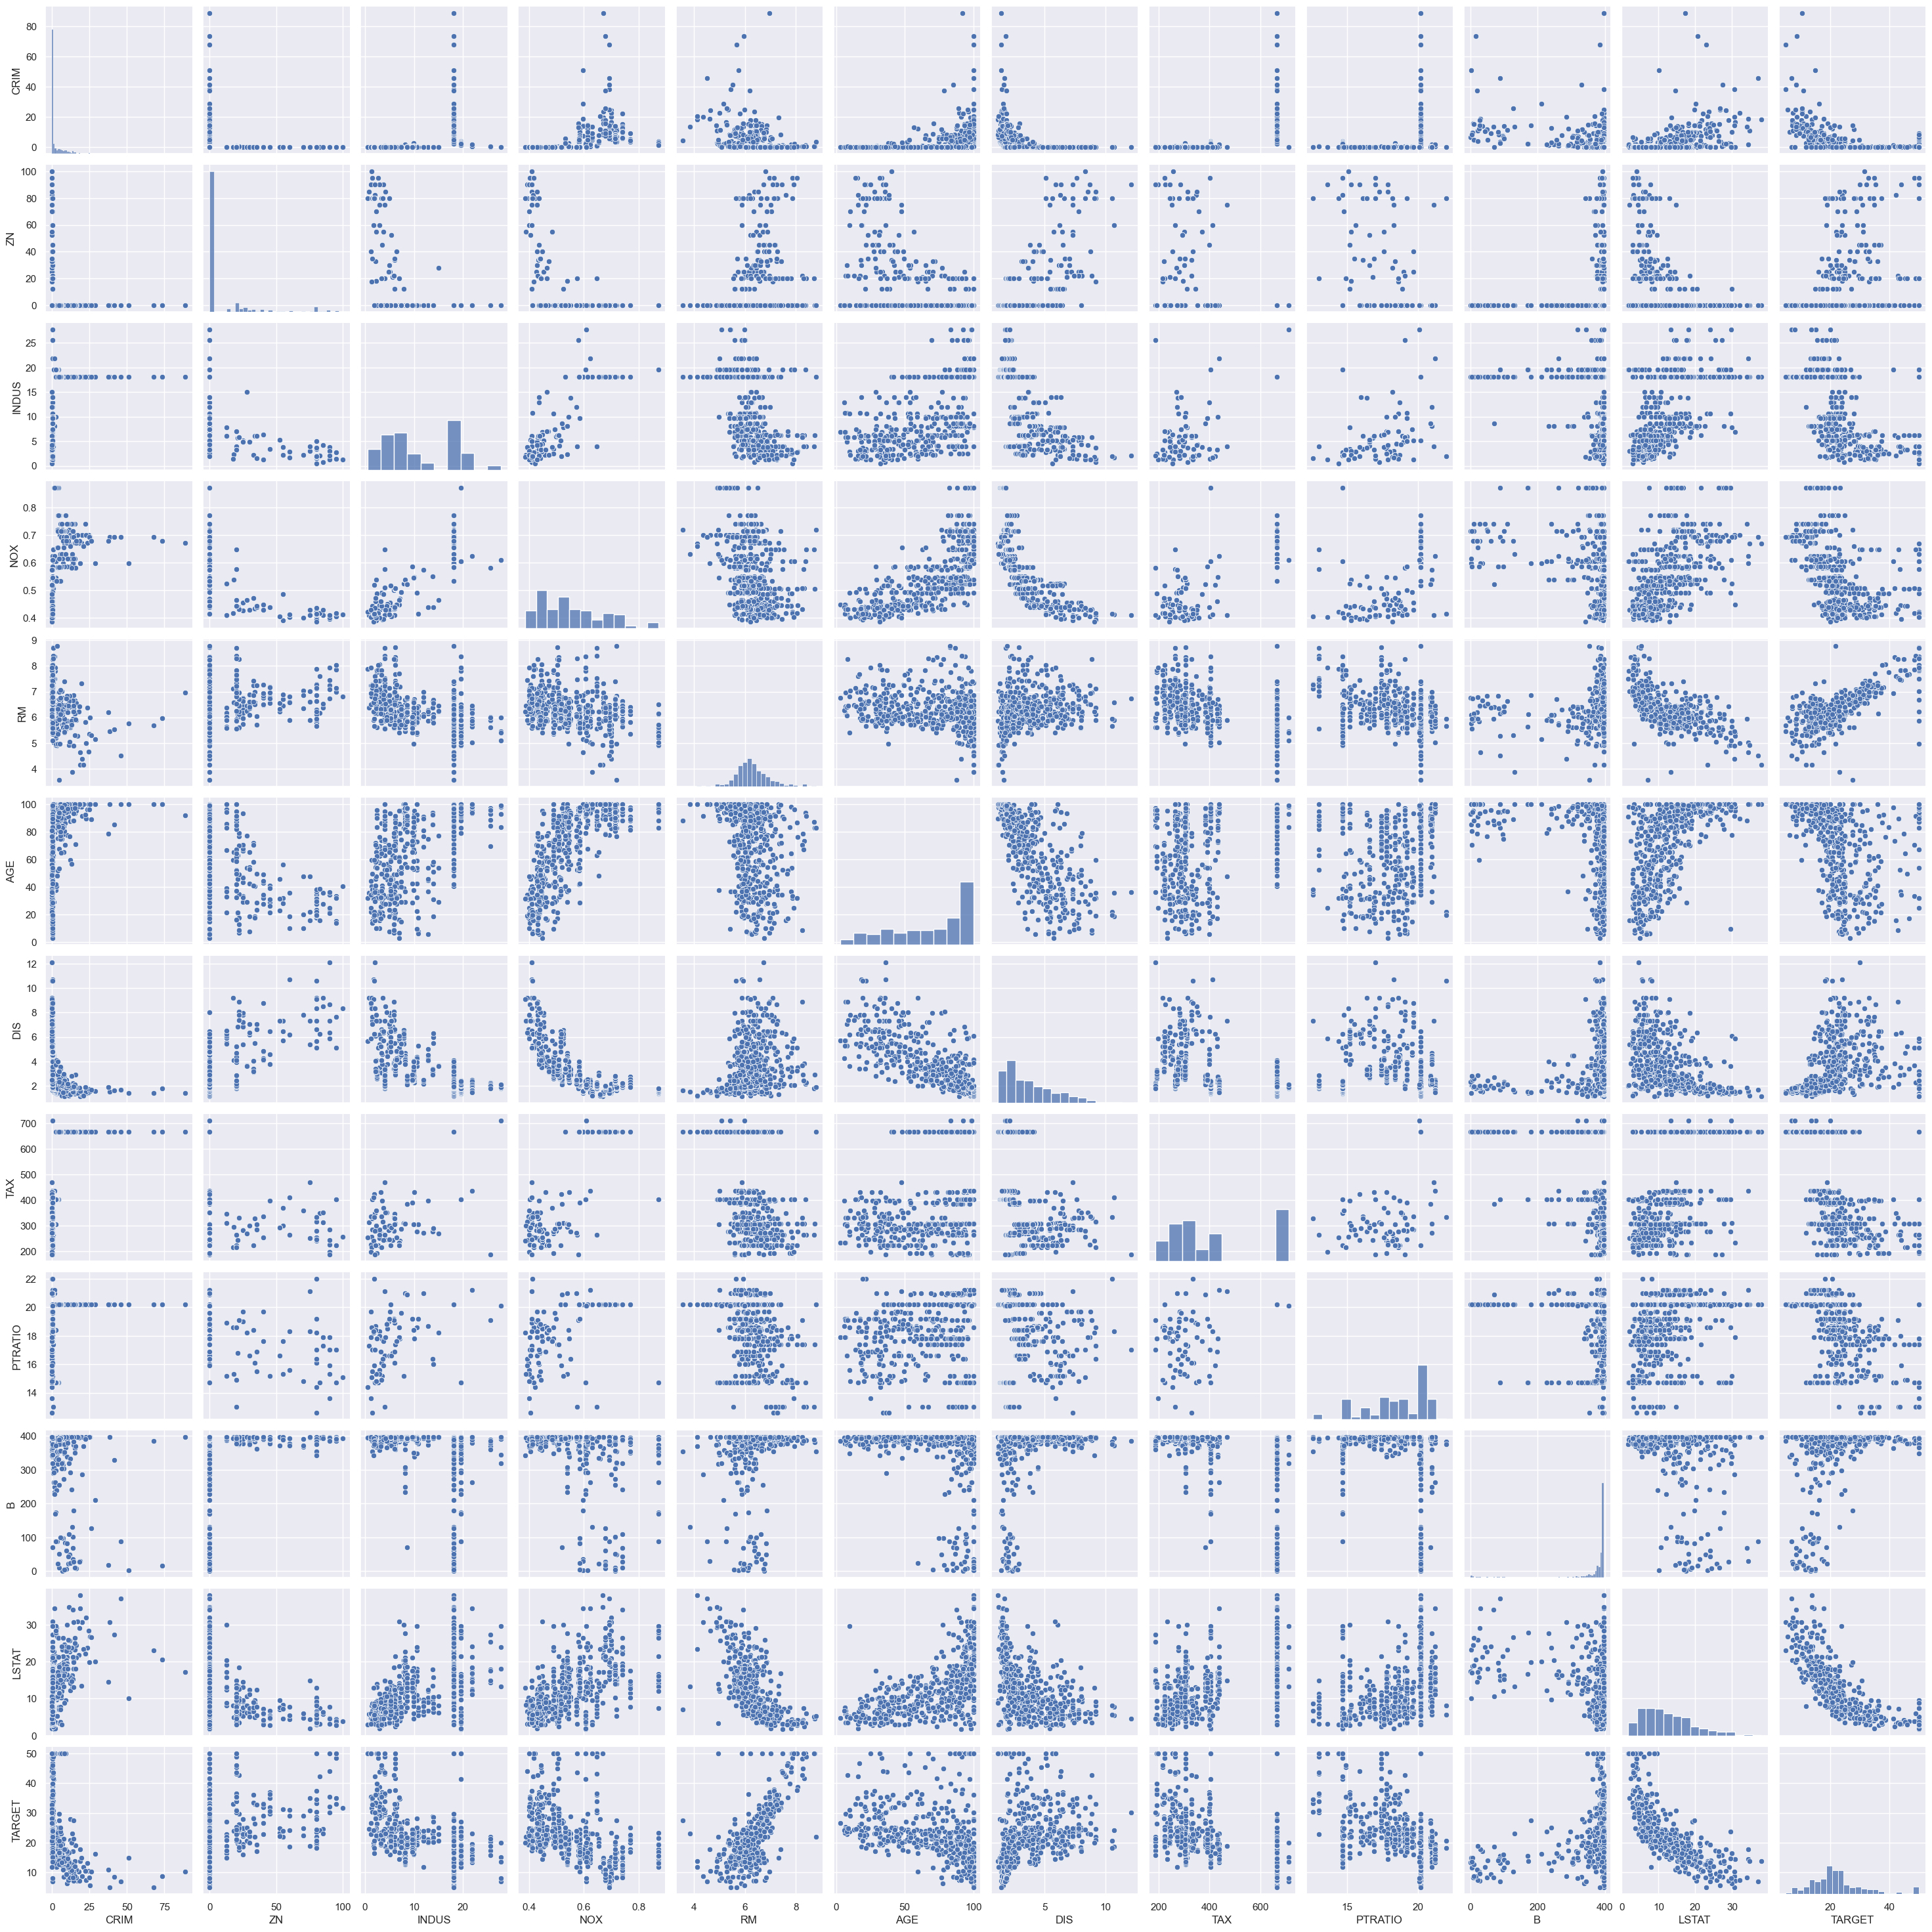

In [16]:
sns.pairplot(boston)
plt.show()

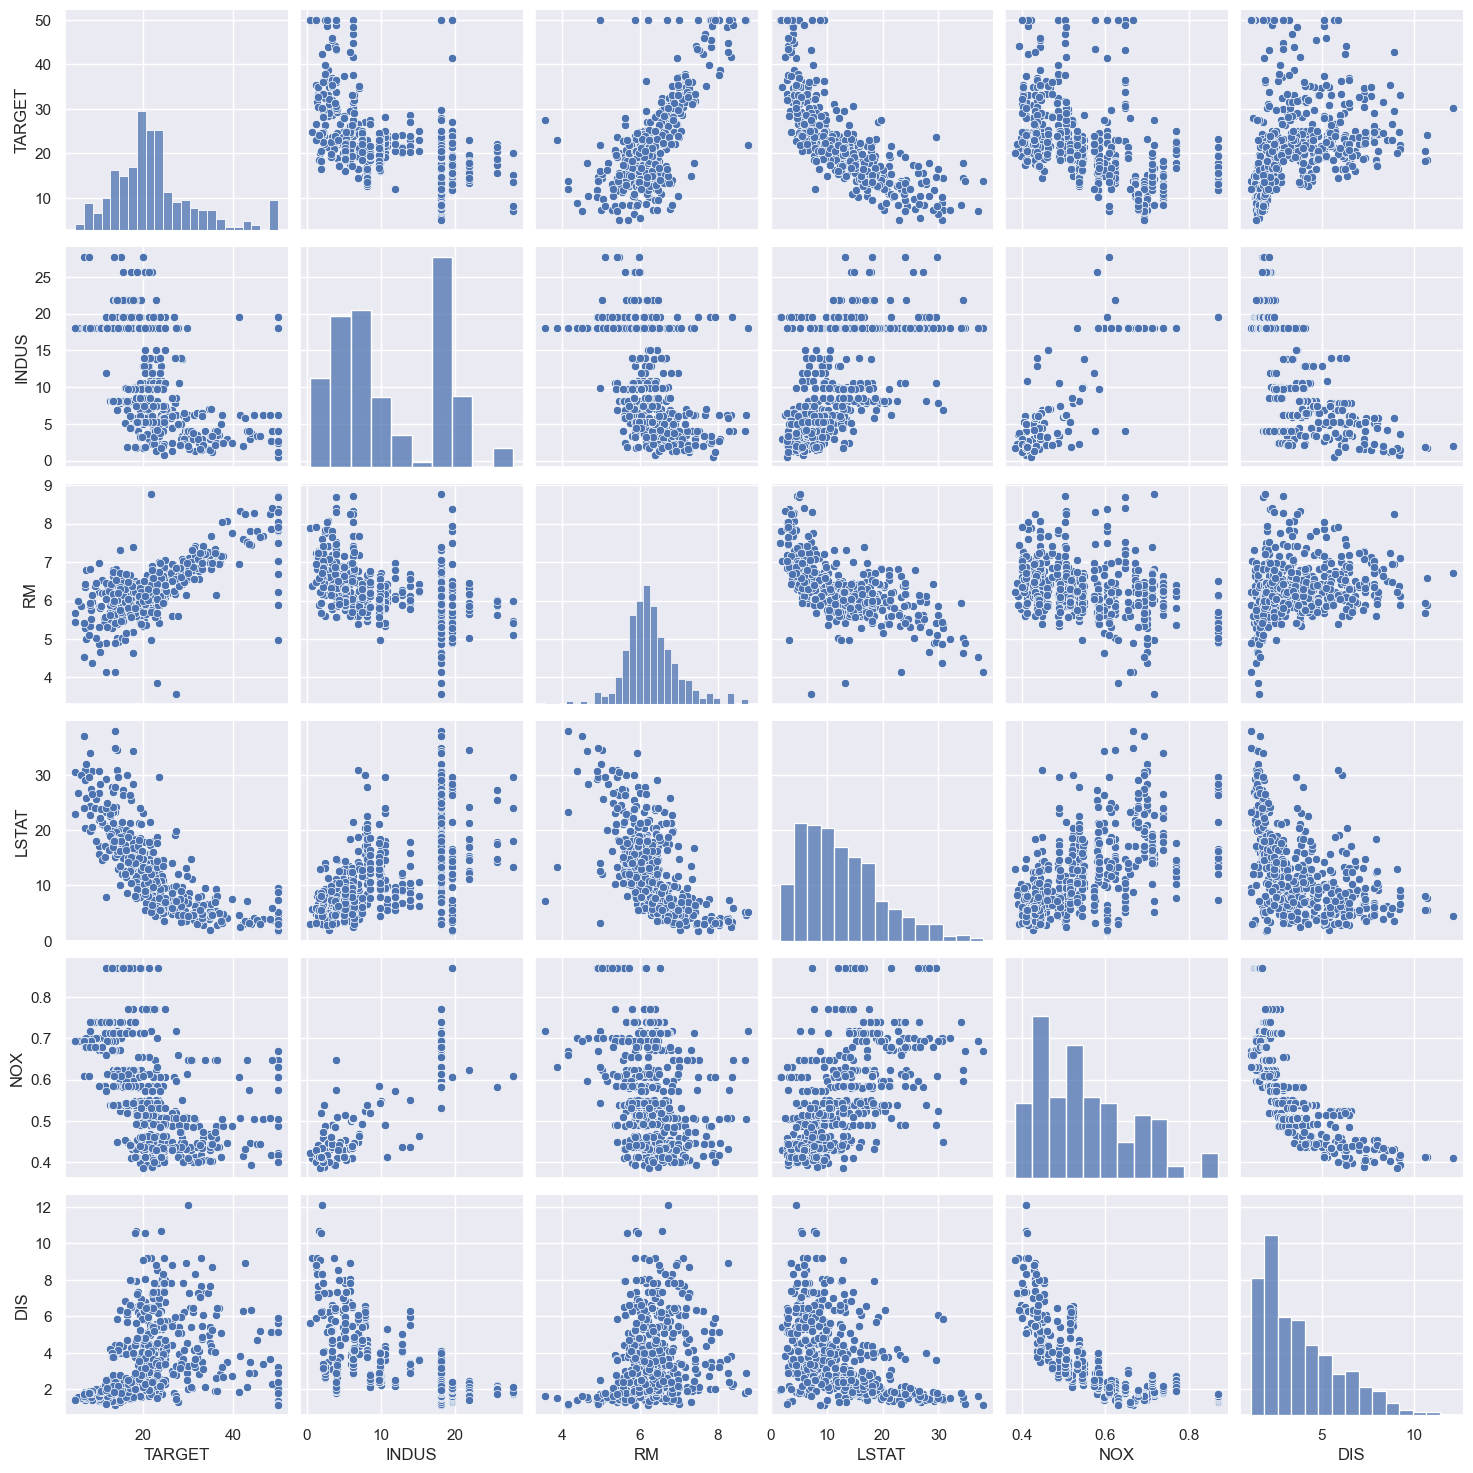

In [17]:
cols=["TARGET","INDUS","RM","LSTAT","NOX","DIS"]
sns.pairplot(boston[cols])
plt.show()

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [19]:
data = torch.from_numpy(boston[cols].values).float()
data.shape

torch.Size([506, 6])

In [20]:
y=data[:,:1]
x=data[:,1:]
print(x.shape,y.shape)

torch.Size([506, 5]) torch.Size([506, 1])


In [21]:
n_epochs = 2000
learning_rate = 1e-3
print_interval=100


In [22]:
model = nn.Linear(x.size(-1), y.size(-1))
print(model)

Linear(in_features=5, out_features=1, bias=True)


In [23]:
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [24]:
for i in range(n_epochs):
    y_hat = model(x)
    loss = F.mse_loss(y_hat,y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % print_interval == 0:
        print("Epoch %d: loss=%.4e" % (i+1,loss))

Epoch 100: loss=4.1649e+01
Epoch 200: loss=3.6027e+01
Epoch 300: loss=3.2940e+01
Epoch 400: loss=3.1200e+01
Epoch 500: loss=3.0219e+01
Epoch 600: loss=2.9666e+01
Epoch 700: loss=2.9354e+01
Epoch 800: loss=2.9178e+01
Epoch 900: loss=2.9078e+01
Epoch 1000: loss=2.9022e+01
Epoch 1100: loss=2.8990e+01
Epoch 1200: loss=2.8971e+01
Epoch 1300: loss=2.8961e+01
Epoch 1400: loss=2.8954e+01
Epoch 1500: loss=2.8950e+01
Epoch 1600: loss=2.8948e+01
Epoch 1700: loss=2.8946e+01
Epoch 1800: loss=2.8945e+01
Epoch 1900: loss=2.8944e+01
Epoch 2000: loss=2.8943e+01


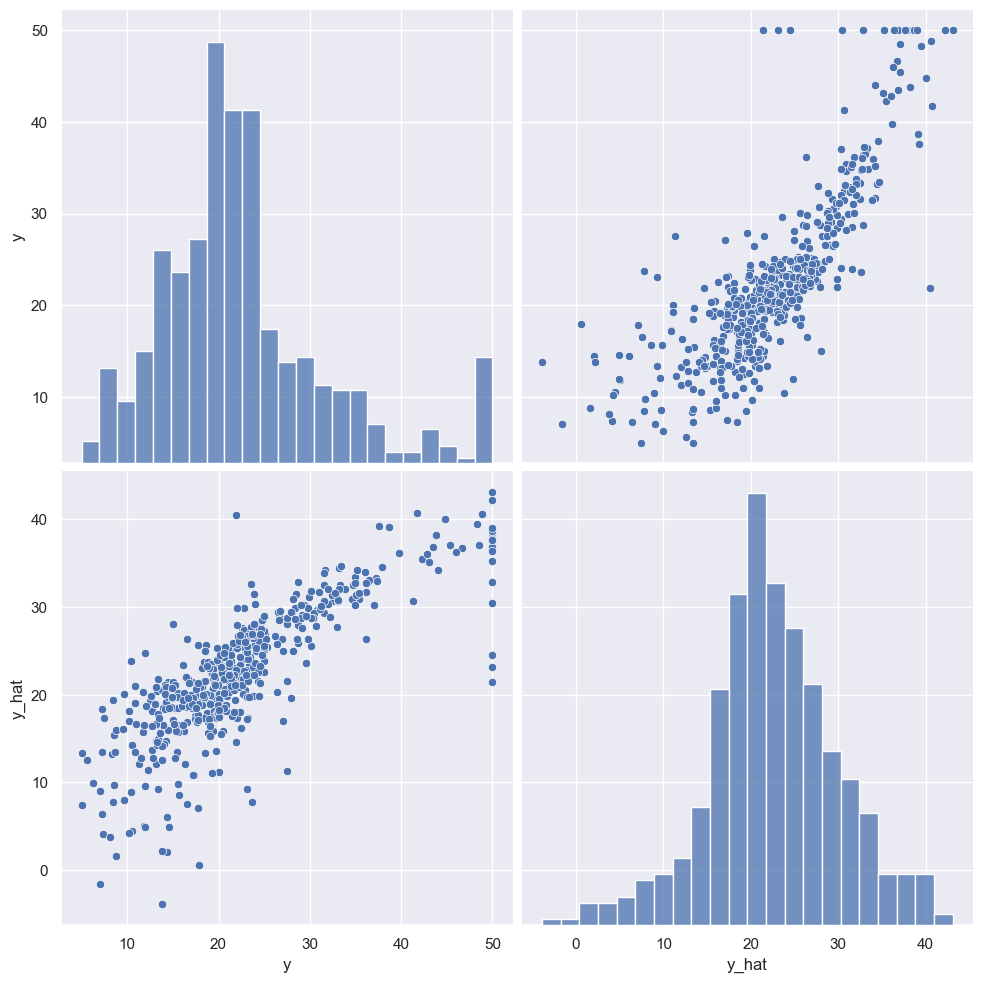

In [25]:
df = pd.DataFrame(torch.cat([y,y_hat], dim=1).detach_().numpy(),columns=["y","y_hat"])
sns.pairplot(df, height=5)
plt.show()

In [30]:
class MulLinearRegModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear=nn.Linear(x.size(-1),y.size(-1))

    def forward(self,x):
        return self.linear(x)

In [31]:
model=MulLinearRegModel()
optimizer=optim.SGD(model.parameters(),lr=learning_rate)

for i in range(n_epochs):
    y_hat=model(x)
    loss=F.mse_loss(y_hat, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    
    if (i+1) % print_interval == 0:
        print("Epoch %d: loss=%.4e" % (i+1,loss))


Epoch 100: loss=4.4758e+01
Epoch 200: loss=3.7798e+01
Epoch 300: loss=3.3945e+01
Epoch 400: loss=3.1774e+01
Epoch 500: loss=3.0550e+01
Epoch 600: loss=2.9860e+01
Epoch 700: loss=2.9470e+01
Epoch 800: loss=2.9251e+01
Epoch 900: loss=2.9127e+01
Epoch 1000: loss=2.9056e+01
Epoch 1100: loss=2.9016e+01
Epoch 1200: loss=2.8994e+01
Epoch 1300: loss=2.8980e+01
Epoch 1400: loss=2.8973e+01
Epoch 1500: loss=2.8968e+01
Epoch 1600: loss=2.8965e+01
Epoch 1700: loss=2.8963e+01
Epoch 1800: loss=2.8962e+01
Epoch 1900: loss=2.8961e+01
Epoch 2000: loss=2.8960e+01
